In [9]:

############################################################################
#Feature Engineering – 
#Project Submission from Group-ID 25: 2019AIML083, 2019AIML066, 2019AIML016
############################################################################

from scipy.io import arff
import math
import pandas as pd
from pandas import DataFrame
import sys, getopt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV,RFE
%matplotlib inline


In [10]:
# Step 1 -  . Convert to csv and load data 

def arff2csv(arff_path, csv_path=None, _encoding='utf8'):
    with open(arff_path, 'r', encoding=_encoding) as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w', encoding=_encoding) as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split()[1])  # @attribute attribute_tag numeric
    print("Convert {} to {}.".format(arff_path, csv_path))

arff2csv('data - original.arff', 'data - original.csv')
pd.set_option('display.max_columns', None)
missing_values = ["-1", " ", ""]
df = pd.read_csv('data - original.csv', na_values = missing_values);

# Step 2 -  Missing value and data transformation.
# Step 3 -: Evaluating the non-contributing features/attributes 
#                 based the Column values before applying PCA
#remove spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#remove columns which are identified as non-influencing columns based on manual analysis
df = df.drop(['Fire_vehicles'],axis=1)
df = df.drop(['Occurrence_involving_freight'],axis=1)
df = df.drop(['Incident_involving_dangerous_freight'],axis=1)
df = df.drop(['Fire'],axis=1)
df = df.drop(['Intermittent_Semaphore'],axis=1)

#Replace T /TRUE  with 1 , F.FALSE with 0
df['Vehicle_excess'] = df['Vehicle_excess'].map({'T': 1, 'F': 0,'t': 1, 'f': 0,'NO': 0, 'YES': 1  })
df['Running_over'] = df['Running_over'].replace({'NO': 0, 'YES': 1})
df['Hour'] = df['Hour'].map({'7:00':1,'7:30':2,'8:00':3,'8:30':4,'9:00':5,'9:30':6,'10:00':7,                             '10:30':8,'11:00':9,'11:30':10,'12:00':11,'12:30':12,'13:00':13,
'13:30':14,'14:00':15,'14:30':16,'15:00':17,'15:30':18,'16:00':19,'16:30':20,
'17:00':21,'17:30':22,'18:00':23,'18:30':24,'19:00':25,'19:30':26,'20:00':27})
print(df.isnull().sum())

print('no of records - ', df.shape)
print(df.info())
print(df.head())

#Replace missing values in Accident_Victim with mean
print ('floor of mean of accident_victim  ',math.floor(df['Accident_victim'].mean()))
       
df['Accident_victim'].fillna(math.floor(df['Accident_victim'].mean()), inplace=True)
df['Vehicle_excess'].fillna(0,inplace=True);
df['Running_over'].fillna(0,inplace=True);
df['Manifestations'].fillna(0,inplace=True);
df['Defect_in_the_network_of_trolleybuses'].fillna(0,inplace=True);
df['Semaphore_off'].fillna(0,inplace=True);

#drop duplicates 
print("Before duplicate removal",df.info())
DataFrame.drop_duplicates(df, inplace = True);
print("After duplicate removal",df.info())

print(df.isnull().sum())

Convert data - original.arff to data - original.csv.
Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          2
Running_over                             0
Lack_of_electricity                      0
Point_of_flooding                        0
Manifestations                           1
Defect_in_the_network_of_trolleybuses    2
Tree_on_the_road                         0
Semaphore_off                            1
Slowness_in_traffic_percent              0
dtype: int64
no of records -  (140, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
Hour                                     140 non-null int64
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null int64

<Figure size 432x288 with 0 Axes>

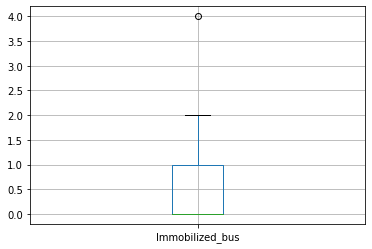

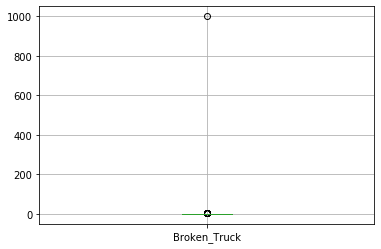

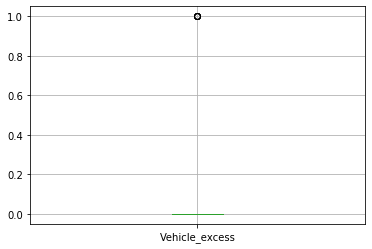

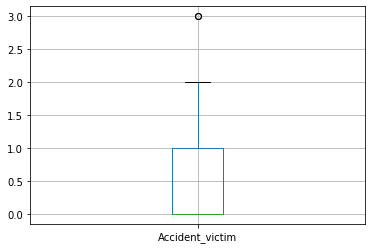

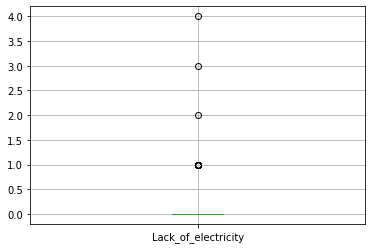

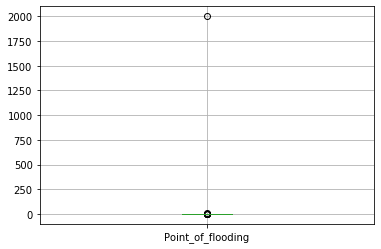

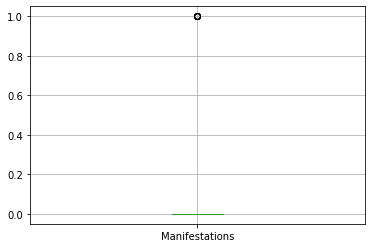

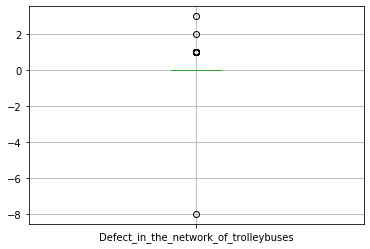

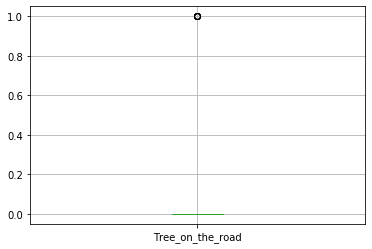

<Figure size 432x288 with 0 Axes>

In [11]:
#Step 5 check outliers

boxplot = df.boxplot(column=['Immobilized_bus'])
plt.figure()
boxplot = df.boxplot(column=['Broken_Truck'])
plt.figure()
boxplot = df.boxplot(column=['Vehicle_excess'])
plt.figure()
boxplot = df.boxplot(column=['Accident_victim'])
plt.figure()
boxplot = df.boxplot(column=['Lack_of_electricity'])
plt.figure()
boxplot = df.boxplot(column=['Point_of_flooding'])
plt.figure()
boxplot = df.boxplot(column=['Manifestations'])
plt.figure()
boxplot = df.boxplot(column=['Defect_in_the_network_of_trolleybuses'])
plt.figure()
boxplot = df.boxplot(column=['Tree_on_the_road'])
plt.figure()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 139
Data columns (total 13 columns):
Hour                                     132 non-null int64
Immobilized_bus                          132 non-null float64
Broken_Truck                             132 non-null float64
Vehicle_excess                           132 non-null int64
Accident_victim                          132 non-null float64
Running_over                             132 non-null object
Lack_of_electricity                      132 non-null float64
Point_of_flooding                        132 non-null float64
Manifestations                           132 non-null float64
Defect_in_the_network_of_trolleybuses    132 non-null float64
Tree_on_the_road                         132 non-null float64
Semaphore_off                            132 non-null float64
Slowness_in_traffic_percent              132 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 14.4+ KB
None
<class 'pandas.core.frame

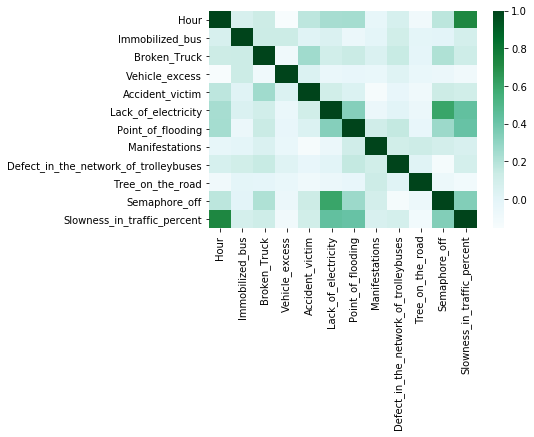

In [13]:
#Step - remove outlier value 
df = df[df.Broken_Truck < 1000]
df = df[df.Point_of_flooding < 2000]
print (df.info())

#Step - Feature Selection
# Splitting the data into train and 
X = df.drop(['Slowness_in_traffic_percent'],axis=1)

print (df.info())
# Putting response variable to y
y = df['Slowness_in_traffic_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)
print(df)
# Corelated features
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='BuGn')

# Extract features that are highly corelated to 'Slowness in traffic', taking threshold as 0.1
correlated_features = set()
for i in range(len(correlation_matrix.drop(labels=['Slowness_in_traffic_percent'], axis=1).columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.1:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(len(correlated_features))
cor_features = []
for i in correlated_features:
    cor_features.append(i)
    
print("Highly correlated features: ",cor_features)


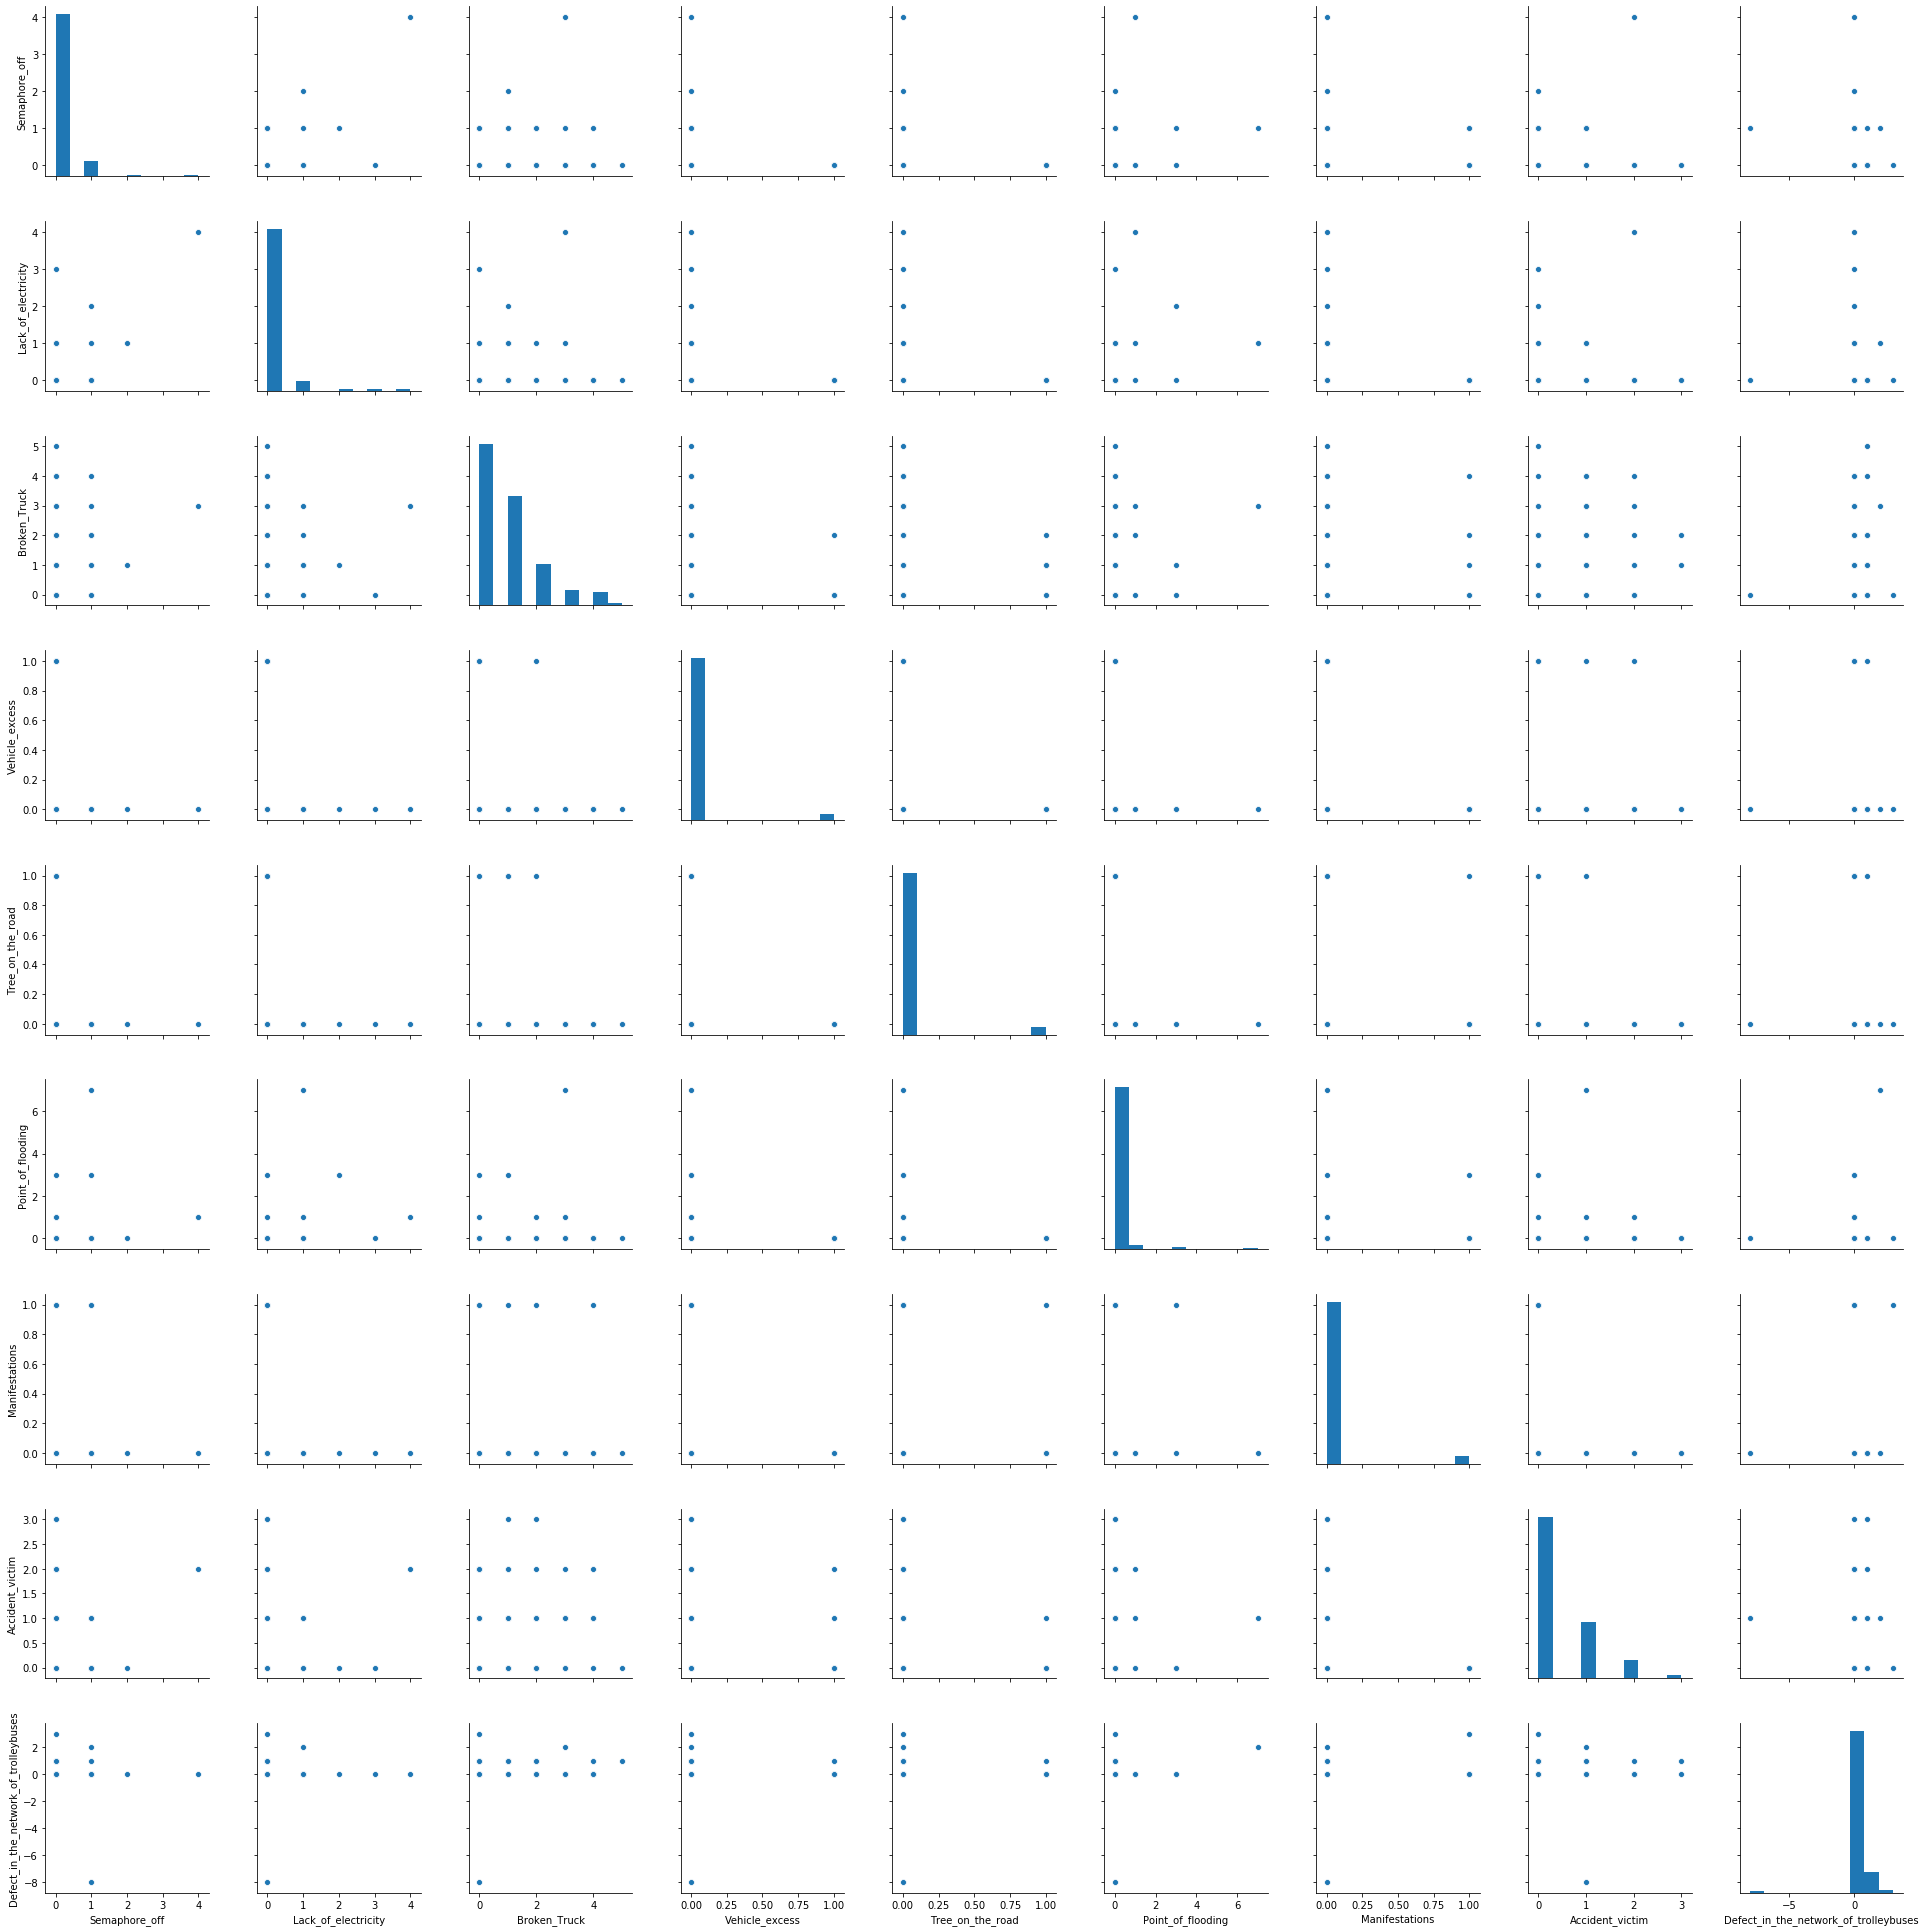

In [14]:
# Identify collinearity among the features selected (from corelation matrix) : Multivariate analysis

sns.pairplot(df[cor_features],height = 3)

In [15]:
#Step - Model building
#####################  Model 1 ############################################

X_train_scaled = StandardScaler().fit_transform(X_train) # normalizing the features
X_test_scaled  = StandardScaler().fit_transform(X_test) # normalizing the features

pca = PCA(n_components=6)
pca.fit(X_train)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

X_train_transformed  = pca.transform(X_train_scaled);
print("PCA transforfm data", X_train_transformed)

X_test_transformed  = pca.transform(X_test_scaled);

# Create the model
model1 = LinearRegression()
# Train the model, using training data set
model1.fit(X_train_transformed, y_train)

# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model1.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model1.intercept_)

y_predicted = model1.predict(X_test_transformed)

print ("predicted slowness value", y_predicted)

print("model score:",model1.score(X_test_transformed, y_test))
#print("accuracy score:",accuracy_score(y_test, y_predicted))
print("mean squared error",mean_squared_error(y_test, y_predicted))
print('Variance score = %.2f' % r2_score(y_test, y_predicted))

[58.79734724  1.11420416  0.65531847  0.49799063  0.3998636   0.19923295]
[0.94760859 0.01795709 0.01056145 0.00802588 0.00644441 0.00321094]
[0.94760859 0.96556568 0.97612714 0.98415301 0.99059742 0.99380836]
PCA transforfm data [[ 1.45012138e+01 -1.37083238e+00  5.28397015e-01 -3.85334985e-02
  -7.01708575e-01 -2.46253032e-01]
 [ 1.37105837e+01  1.43871274e-01 -5.34326583e-01  3.39202638e+00
   8.53046709e-01 -4.71892796e-01]
 [ 1.27233832e+01  1.01284987e+00  4.96010992e+00 -4.53353982e-01
   2.87508554e-01 -3.08267538e+00]
 [ 1.25960842e+01 -1.01248920e+00 -1.55253475e-02  2.30759448e+00
   4.49306304e-01 -3.22758044e-01]
 [ 1.34036094e+01 -1.10111548e+00  8.33447655e-03  2.39725272e+00
   6.96318819e-01 -4.64554017e-01]
 [ 1.47325253e+01 -4.69728602e-01  2.67057634e-01 -1.52772899e-01
  -9.04198993e-01 -3.28536240e-01]
 [ 1.30588366e+01 -1.43061354e+00  5.17004687e-01 -5.86535327e-02
  -7.25848376e-01 -2.23782359e-01]
 [ 1.37484645e+01 -2.73890380e-01  5.63396636e-01  8.95310393e-

In [16]:
#RFE - Recursive Feature eliminiation

lr = LinearRegression()
rfe = RFE(estimator=lr, step=1)
rfe.fit(X_train, y_train)

print('Optimal number of features: {}'.format(rfe.n_features_))
print(rfe.support_)
print(rfe.ranking_)


Optimal number of features: 6
[False False False False False  True  True  True  True False  True  True]
[2 3 4 6 7 1 1 1 1 5 1 1]


In [17]:
#####################  Model 2 ############################################

# Identify  important feature. by reversely removing low ranked features 
#no of features
print(X_train)
nof_list=np.arange(1,13) 
print(nof_list)
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

#columns = list(X.columns)
model2 = LinearRegression()
#Initializing RFE model
rfe = RFE(model2, 7)

#Transforming data using RFE
#Feature identified on training data 
X_train_rfe = rfe.fit_transform(X_train,y_train)
#transformation is applied on test data
X_test_rfe = rfe.transform(X_test)

#Scaling for PCA
X_train_rfe_scaled = StandardScaler().fit_transform(X_train_rfe) # normalizing the features
X_test_rfe_scaled  = StandardScaler().fit_transform(X_test_rfe) # normalizing the features


columns = list(X_train.columns);
temp = pd.Series(rfe.support_,index = columns)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

pca = PCA(n_components=5)
pca.fit(X_train_rfe)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

X_train_rfe_transformed  = pca.transform(X_train_rfe_scaled);
print("PCA transforfm data with rfe", X_train_rfe_transformed)

X_test_rfe_transformed  = pca.transform(X_test_rfe_scaled);

# Create the model
model2 = LinearRegression()
# Train the model, using training data set
model2.fit(X_train_rfe_transformed, y_train)

# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model2.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model2.intercept_)

y_rfe_predicted = model2.predict(X_test_rfe_transformed)

print ("predicted slowness value with rfe", y_rfe_predicted)

print("model score:",model2.score(X_test_rfe_transformed, y_test))
print("mean squared error",mean_squared_error(y_test, y_rfe_predicted))
print('Variance score = %.2f' % r2_score(y_test, y_rfe_predicted))


     Hour  Immobilized_bus  Broken_Truck  Vehicle_excess  Accident_victim  \
40     12              0.0           0.0               0              0.0   
45     17              0.0           1.0               0              3.0   
80     24              0.0           1.0               0              0.0   
26     26              0.0           0.0               0              2.0   
132    20              0.0           0.0               1              2.0   
121    10              0.0           1.0               0              0.0   
23     23              0.0           0.0               0              0.0   
101    17              0.0           1.0               0              1.0   
6       7              0.0           0.0               0              0.0   
3       4              0.0           0.0               0              0.0   
46     18              1.0           5.0               0              0.0   
13     14              2.0           2.0               0              1.0   